# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading and storing USA commenets dataset in the dataframe video.
videos = pd.read_csv("I:\My Drive\Projects\youtube_text_data_analysis/UScomments.csv", error_bad_lines= False)
videos.head()
#videos.describe()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\SCHOOL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


# Perform Sentiment analysis onutube data

## textblob library
1. textblob package is downloaded
2. Import TextBlob class from the library to perform the sentiment analysis
3. call sentiments and polarity attributes of class TextBlob to check the polarity of sentiment. 
4. 1 indicates highly positive sentiment while -1 indicates highly neagtive sentiment. o indicates neutral sentiment.


In [5]:
!pip install textblob # This library is used for the sentiment analysis

ERROR: Invalid requirement: '#'


In [6]:
from textblob import TextBlob # Importing TextBlob class from textblob class to perform sentiment analysis

In [7]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [8]:
# polarity = [TextBlob(i).sentiment.polarity for i in videos['comment_text']]

polarity =[]
for i in videos["comment_text"]:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0) 
    

In [9]:
# Adding the polarity of comments of each observation in the dataframe.
videos["polarity"] = polarity
videos.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Performing EDA on text data
Using the wordcloud 

In [10]:
!pip install wordcloud

In [11]:
from wordcloud import WordCloud, STOPWORDS # (is, am, I, the, tem, there, etc can be ignored using the stopwords)

## Performing Positive Sentiment Analysis using WordCloud

In [12]:
# Filtering the observations for which comments represents a positive sentiments

comments_positive_sentiments = videos[videos["polarity"] == 1]

In [13]:
comments_positive_sentiments.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [14]:
# Joining all the pasoitive comments from the dataframe in to a single comment line.

total_comments_positive = " ".join(comments_positive_sentiments["comment_text"])
total_comments_positive

"yu are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D This is priceless Summed up perfectly This is awesome. 1:20 XDDDDDDDDD BEST MOVIE EVER!!! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The greatest movie about the greatest movie. It's Harry guys he's Spiderman best friend Best remake ever! Great review! awesome vlog Subscribe to me if Roman Atwood is the best youtuber I was attacked by a police dog once, \\n\\n\\n\\n\\n\\nthat was the best use of peanut butter ever. The best part of the movie was the credits DO THE ORIGINAL STEPHEN KING'S IT!!!!!!!!!!!!!! 🤣🤣🤣🤣😃😃😃😃 i downloaded and saw The Mummy 2017  in the best quality guys. here's the Iink https://twitter.com/akewdiudri/status/907980087676477442\\nyou must see too guys! that was awesome. 

In [15]:
# Creting wordcloud ocject
wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 999.5, 499.5, -0.5)

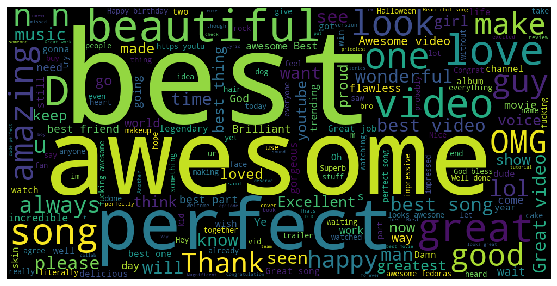

In [16]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [17]:
# Function to separate different sentiments from the comments and store it in a list
'''
def sentiments(df, polarity):
    if(polarity == 1):
        "comments_sentiment_{}".format(sent) = df[df["polarity"] == polarity]
        return("comments_sentiment_{}".format(sent))
    elif(polarity == -1):
        "comments_sentiment_{}".format(sent) = df[df["polarity"] == polarity]
        return("comments_sentiment_{}".format(sent))
    else:
        "comments_sentiment_{}".format(sent) = df[df["polarity"] == polarity]
        return("comments_sentiment_{}".format(sent))
'''        

'\ndef sentiments(df, polarity):\n    if(polarity == 1):\n        "comments_sentiment_{}".format(sent) = df[df["polarity"] == polarity]\n        return("comments_sentiment_{}".format(sent))\n    elif(polarity == -1):\n        "comments_sentiment_{}".format(sent) = df[df["polarity"] == polarity]\n        return("comments_sentiment_{}".format(sent))\n    else:\n        "comments_sentiment_{}".format(sent) = df[df["polarity"] == polarity]\n        return("comments_sentiment_{}".format(sent))\n'

## Performing Negative Sentiment Analysis using WordCloud

In [18]:
comments_negative_sentiments = videos[videos["polarity"] == -1]

In [19]:
comments_negative_sentiments.head(5)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [20]:
total_comments_negative = " ".join(comments_negative_sentiments["comment_text"])
total_comments_negative

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

(-0.5, 999.5, 499.5, -0.5)

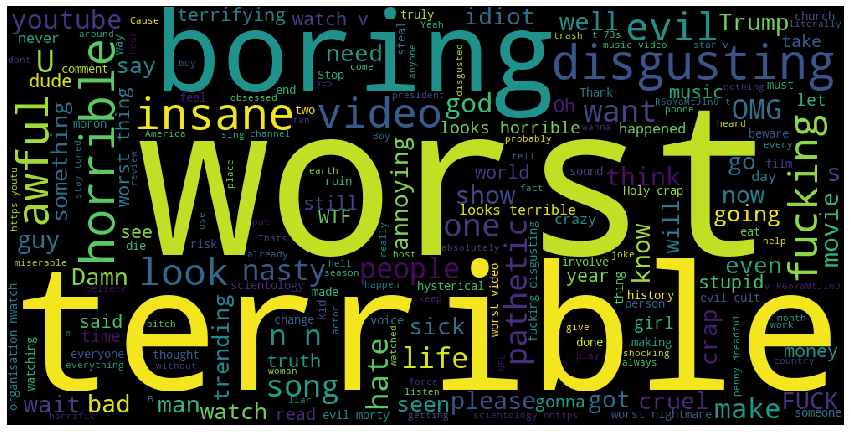

In [21]:
wordcloud =  WordCloud(width = 1000, height =500, stopwords = set(STOPWORDS)).generate(total_comments_negative)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")

# Analyzing Tags colums, what are the trending tags on youtube.

In [22]:
videos2 = pd.read_csv("I:\My Drive\Projects\youtube_text_data_analysis/USvideos.csv", error_bad_lines= False)
videos2.head(5)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


#### Fetching tag data from the dataframe and cleaning 

In [23]:
tags_complete = " ".join(videos2["tags"])

In [27]:
videos2['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [28]:
import re # library for text manipulation regular expression

In [31]:
# call sub() of the re package for substituting | with  " "

tags = re.sub('[^a-zA-z]', ' ', tags_complete)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone [none] apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [35]:
# replacing more than one space with a single space

tags = re.sub('\s+', " ", tags) # \s+ looks for atleast one space in the string and replaces it with single space.

#### Creating wordcloud from tags to get the trending tags on youtube

(-0.5, 999.5, 499.5, -0.5)

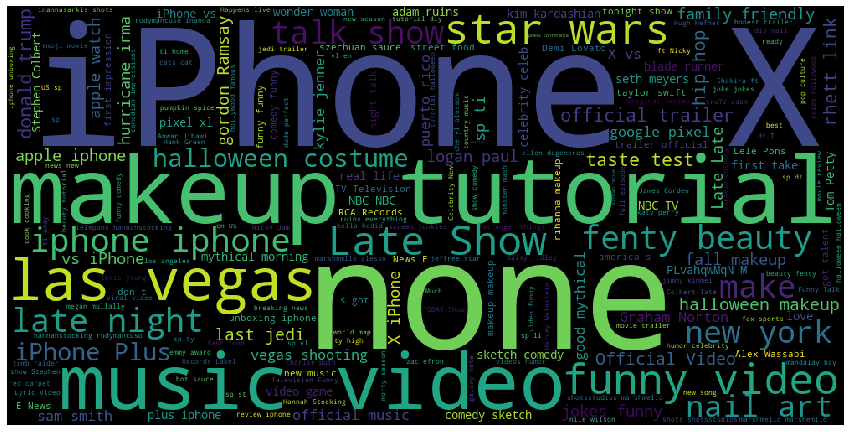

In [42]:
# Creatinga and generating a wordcloud Image.
wordcloud = WordCloud(width = 1000, height = 500, stopwords = set (STOPWORDS)).generate(tags) 

# displaying the generated image
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

# Analyzing likes, dislikes & views, and finding how they are coreelated with each other.